<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task6/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


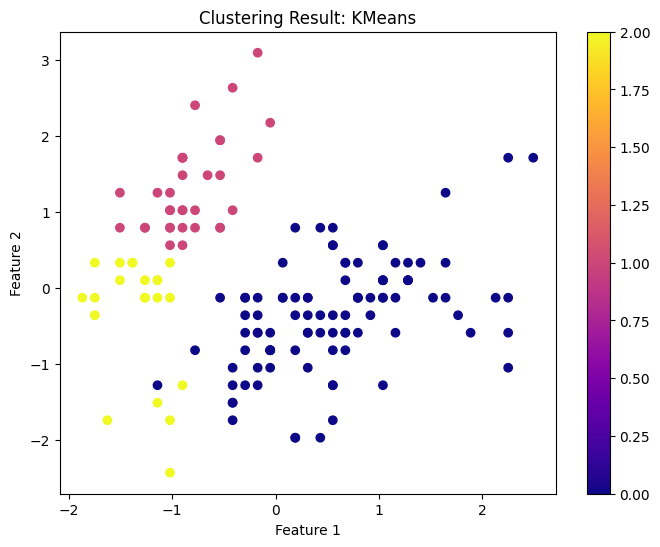

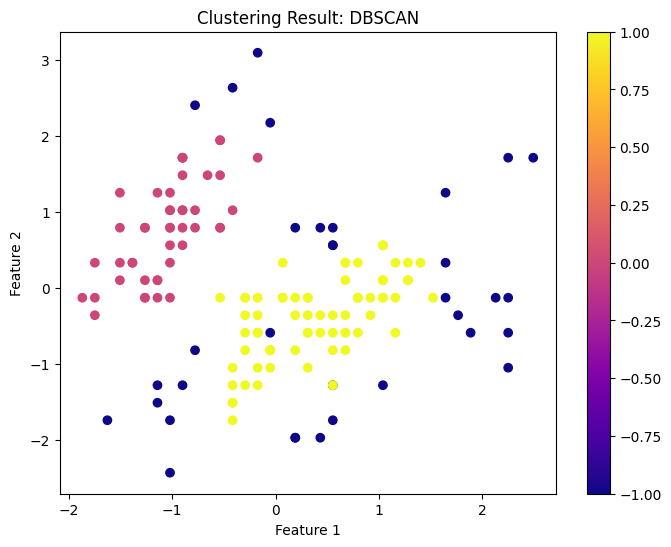

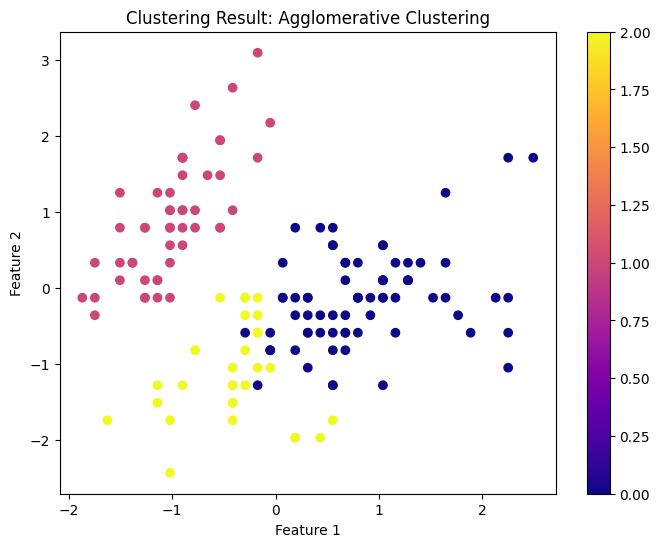

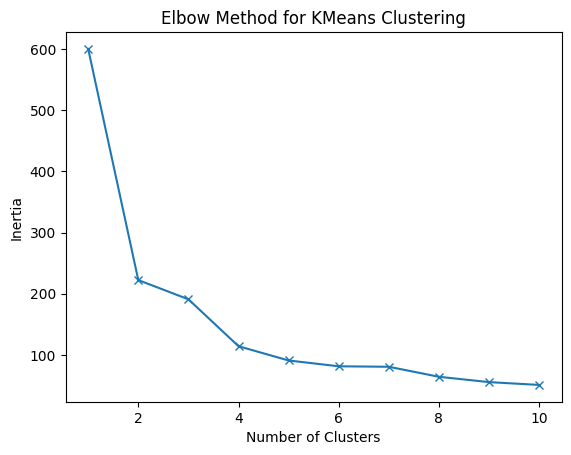

Silhouette Score KMeans: 0.4798814508199817
Silhouette Score DBSCAN: 0.35651648142700726
Silhouette Score Agglomerative Clustering: 0.4466890410285909
ARI KMeans: 0.432804702527474
ARI DBSCAN: 0.4420986685885924
ARI Agglomerative Clustering: 0.6153229932145449
V-Measure KMeans: 0.5895674488004072
V-Measure DBSCAN: 0.5114298559522713
V-Measure Agglomerative Clustering: 0.6754701853436886
                    KMeans    DBSCAN  Agglomerative Clustering
Silhouette Score  0.479881  0.356516                  0.446689
ARI               0.432805  0.442099                  0.615323
V-Measure         0.589567  0.511430                  0.675470
Model Terbaik Berdasarkan Evaluasi: V-Measure


In [7]:
# Install library yang diperlukan
!pip install -U scikit-learn matplotlib

# Import pustaka yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Memuat Dataset
file_path = '/content/drive/MyDrive/Dataset/Online Retail.xlsx'
data = pd.read_excel(file_path)

# Simpan data dan target
features = dataset.data
actual_labels = dataset.target

# 2. Normalisasi Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Membuat Model Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Melatih model dan mendapatkan hasil clustering
kmeans_results = kmeans_model.fit_predict(features_scaled)
dbscan_results = dbscan_model.fit_predict(features_scaled)
agg_results = agg_clustering.fit_predict(features_scaled)

# 4. Fungsi Visualisasi Clustering
def plot_cluster_results(X, labels, method_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
    plt.title(f'Clustering Result: {method_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

plot_cluster_results(features_scaled, kmeans_results, 'KMeans')
plot_cluster_results(features_scaled, dbscan_results, 'DBSCAN')
plot_cluster_results(features_scaled, agg_results, 'Agglomerative Clustering')

# 5. Elbow Method untuk Menentukan Jumlah Cluster pada KMeans
def kmeans_elbow_method(X_scaled):
    inertia_values = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42)
        kmeans_temp.fit(X_scaled)
        inertia_values.append(kmeans_temp.inertia_)
    plt.plot(k_range, inertia_values, marker='x')
    plt.title('Elbow Method for KMeans Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

kmeans_elbow_method(features_scaled)

# 6. Menghitung Silhouette Score untuk Setiap Model Clustering
score_kmeans = silhouette_score(features_scaled, kmeans_results)
score_dbscan = silhouette_score(features_scaled, dbscan_results) if len(set(dbscan_results)) > 1 else -1
score_agg = silhouette_score(features_scaled, agg_results)

print(f'Silhouette Score KMeans: {score_kmeans}')
print(f'Silhouette Score DBSCAN: {score_dbscan}')
print(f'Silhouette Score Agglomerative Clustering: {score_agg}')

# 7. Menghitung ARI dan V-Measure
ari_kmeans = adjusted_rand_score(actual_labels, kmeans_results)
ari_dbscan = adjusted_rand_score(actual_labels, dbscan_results)
ari_agg = adjusted_rand_score(actual_labels, agg_results)

v_measure_kmeans = v_measure_score(actual_labels, kmeans_results)
v_measure_dbscan = v_measure_score(actual_labels, dbscan_results)
v_measure_agg = v_measure_score(actual_labels, agg_results)

print(f'ARI KMeans: {ari_kmeans}')
print(f'ARI DBSCAN: {ari_dbscan}')
print(f'ARI Agglomerative Clustering: {ari_agg}')

print(f'V-Measure KMeans: {v_measure_kmeans}')
print(f'V-Measure DBSCAN: {v_measure_dbscan}')
print(f'V-Measure Agglomerative Clustering: {v_measure_agg}')

# 8. Membandingkan Hasil Evaluasi untuk Memilih Model Terbaik
model_scores = {
    'KMeans': {
        'Silhouette Score': score_kmeans,
        'ARI': ari_kmeans,
        'V-Measure': v_measure_kmeans
    },
    'DBSCAN': {
        'Silhouette Score': score_dbscan,
        'ARI': ari_dbscan,
        'V-Measure': v_measure_dbscan
    },
    'Agglomerative Clustering': {
        'Silhouette Score': score_agg,
        'ARI': ari_agg,
        'V-Measure': v_measure_agg
    }
}

# Menampilkan Hasil Evaluasi Setiap Model
scores_df = pd.DataFrame(model_scores)
print(scores_df)

# Memilih Model Terbaik Berdasarkan Rata-rata Nilai Evaluasi
best_model_name = scores_df.mean(axis=1).idxmax()
print(f'Model Terbaik Berdasarkan Evaluasi: {best_model_name}')
